In [ ]:
# Import libraries and packages 

%matplotlib inline
from pathlib import Path
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [ ]:
# Import dataset

df = pd.read_csv('Cereals.csv')
df.set_index('name', inplace=True)

In [ ]:
# Remove missing values

df=df.dropna()

In [ ]:
# Check dataset summary 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 100%_Bran to Wheaties_Honey_Gold
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mfr       74 non-null     object 
 1   type      74 non-null     object 
 2   calories  74 non-null     int64  
 3   protein   74 non-null     int64  
 4   fat       74 non-null     int64  
 5   sodium    74 non-null     int64  
 6   fiber     74 non-null     float64
 7   carbo     74 non-null     float64
 8   sugars    74 non-null     float64
 9   potass    74 non-null     float64
 10  vitamins  74 non-null     int64  
 11  shelf     74 non-null     int64  
 12  weight    74 non-null     float64
 13  cups      74 non-null     float64
 14  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ KB


In [ ]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


In [ ]:
# Drop irrelevant colums in our analysis

df=df.drop(columns=['mfr','type'],axis=1)

* Apply hierarchical clustering to the normalized data using Euclidean distance.

In [ ]:
df = df.apply(lambda x: x.astype('float64'))
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912
Apple_Cinnamon_Cheerios,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.0,25.0,1.0,1.0,0.75,29.509541


In [ ]:
# Normalize data

df_norm = df.apply(preprocessing.scale, axis=0)
df_norm

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,0.948401,-0.202203,-2.099895,1.867565
100%_Natural_Bran,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919,-0.601791
All-Bran,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,0.948401,-0.202203,-2.099895,1.223491
All-Bran_with_Extra_Fiber,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763,3.682812
Apple_Cinnamon_Cheerios,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-1.471657,-0.202203,-0.305922,-0.922781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,0.150841,-0.480589,0.0,1.066009,-0.903910,1.622199,-0.948852,-0.547081,-0.183083,0.948401,-0.202203,-0.305922,-0.234286
Trix,0.150841,-1.416474,0.0,-0.272050,-0.903910,-0.447503,1.129883,-1.044254,-0.183083,-0.261628,-0.202203,0.761919,-1.048780
Wheat_Chex,-0.356533,0.455295,0.0,0.822725,0.342475,0.587348,-0.948852,0.234189,-0.183083,-1.471657,-0.202203,-0.647631,0.532024


In [ ]:
# Calculate Euclidean distances

d_norm = pairwise.pairwise_distances(df_norm, metric='euclidean')
pd.DataFrame(d_norm, columns=df_norm.index, index=df_norm.index).head(5)

name,100%_Bran,100%_Natural_Bran,All-Bran,All-Bran_with_Extra_Fiber,Apple_Cinnamon_Cheerios,Apple_Jacks,Basic_4,Bran_Chex,Bran_Flakes,Cap'n'Crunch,Cheerios,Cinnamon_Toast_Crunch,Clusters,Cocoa_Puffs,Corn_Chex,Corn_Flakes,Corn_Pops,Count_Chocula,Cracklin'_Oat_Bran,Crispix,Crispy_Wheat_&_Raisins,Double_Chex,Froot_Loops,Frosted_Flakes,Frosted_Mini-Wheats,"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats",Fruitful_Bran,Fruity_Pebbles,Golden_Crisp,Golden_Grahams,Grape_Nuts_Flakes,Grape-Nuts,Great_Grains_Pecan,Honey_Graham_Ohs,Honey_Nut_Cheerios,Honey-comb,Just_Right_Crunchy__Nuggets,Just_Right_Fruit_&_Nut,Kix,Life,Lucky_Charms,Maypo,"Muesli_Raisins,_Dates,_&_Almonds","Muesli_Raisins,_Peaches,_&_Pecans",Mueslix_Crispy_Blend,Multi-Grain_Cheerios,Nut&Honey_Crunch,Nutri-Grain_Almond-Raisin,Nutri-grain_Wheat,Oatmeal_Raisin_Crisp,Post_Nat._Raisin_Bran,Product_19,Puffed_Rice,Puffed_Wheat,Quaker_Oat_Squares,Raisin_Bran,Raisin_Nut_Bran,Raisin_Squares,Rice_Chex,Rice_Krispies,Shredded_Wheat,Shredded_Wheat_'n'Bran,Shredded_Wheat_spoon_size,Smacks,Special_K,Strawberry_Fruit_Wheats,Total_Corn_Flakes,Total_Raisin_Bran,Total_Whole_Grain,Triples,Trix,Wheat_Chex,Wheaties,Wheaties_Honey_Gold
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100%_Bran,0.000000,7.545591,1.931841,3.414085e+00,7.078209,7.555426,7.360148,5.735218,4.173751,8.296163,7.969242,8.322439,5.668895,8.132000,8.941140,8.446966,7.886402,8.087149,4.940153,8.037354,5.820200,6.853564,7.459194,7.980781,5.760103,5.184016,5.835553,7.852716,7.780463,8.113504,5.742428,5.776826,5.820533,8.188635,6.841788,9.038638,8.132514,8.428172,9.350800,5.560791,7.698005,6.939931,7.362751,7.422864,8.169847,7.085999,7.597546,7.525022,6.295592,6.733408,5.320705,8.578181,8.401266,7.527622,5.194668,5.829509,4.987633,5.745605,9.398164,8.924313,7.015042,6.328059,6.734234,7.137633,7.623938,6.328777,8.916020,8.332777,6.991537,7.875975,8.170772,6.204149,6.620169,7.404315
100%_Natural_Bran,7.545591,0.000000,7.803870,1.004679e+01,4.905484,5.965405,5.383080,6.225597,6.515009,5.342434,6.802105,4.700281,4.418755,5.618339,7.843889,7.834272,6.141399,5.594910,3.709176,7.037535,4.849583,6.508415,5.100206,6.901739,5.955589,4.690639,6.791473,5.622485,6.337905,6.342107,5.196243,7.044191,4.202866,5.057063,5.850577,6.902670,6.932441,7.486137,6.972376,4.538450,5.298805,5.435957,3.827421,4.043243,6.080106,5.945576,5.662366,5.997834,6.688064,4.871435,6.126170,8.559156,8.018168,7.677123,5.464640,6.113945,4.337329,6.326695,7.994841,7.863710,7.166689,7.472634,7.498003,5.116023,7.488654,6.211937,7.620178,7.783614,7.016529,6.505805,5.538087,6.425087,6.154273,6.007113
All-Bran,1.931841,7.803870,0.000000,4.058567e+00,6.908322,7.611106,6.986007,5.468380,3.762740,7.981891,7.468087,7.996706,5.560918,7.922762,8.438399,7.936138,8.002498,7.864470,4.878814,7.694537,5.734562,6.534888,7.502535,7.774882,6.258500,5.002971,5.383319,7.786897,8.015605,7.592935,5.723744,5.594048,5.981023,7.897399,6.426102,8.858147,7.913052,8.173433,8.904573,5.486618,7.494185,7.205038,7.303884,7.200182,7.952582,6.744915,7.324969,7.082548,6.145025,6.467153,4.971279,7.992007,8.755081,7.970356,5.133351,5.393916,4.897261,6.151633,8.984598,8.383201,7.410351,6.718545,7.071059,7.362560,7.338796,6.726131,8.584944,8.005740,6.706241,7.343999,8.094109,5.776686,6.333002,7.113256
All-Bran_with_Extra_Fiber,3.414085,10.046789,4.058567,1.685874e-07,9.569720,9.801933,9.490618,7.530684,5.965517,10.847041,9.287380,10.822979,8.253864,10.464864,10.312459,9.681051,9.936354,10.424620,7.727588,9.416984,8.294899,8.591041,9.810432,10.071914,7.505781,7.675146,7.905952,10.242995,10.037847,10.325987,7.581311,7.628889,8.338772,10.541108,9.212451,10.853092,9.898957,10.303775,10.652271,7.967316,10.047971,8.594750,9.636591,9.714451,10.448539,8.875201,9.940767,9.446668,7.421293,9.380738,7.706971,9.891585,9.407457,8.550779,7.512898,7.967098,7.763096,7.610717,10.618538,10.297830,7.830011,7.078217,7.564710,9.767329,9.058407,7.690977,10.440947,10.233966,8.466716,9.611344,10.417327,7.86994

* Compare the dendrograms and cluster centroids from single linkage and complete linkage. 


### 1. Single Linkage

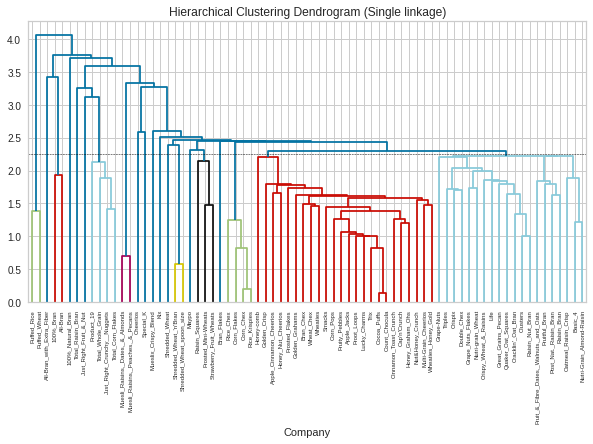

In [ ]:
# Single Linkage Dendrogram

Z = linkage(df_norm, method='single')
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=df_norm.index, color_threshold=2.25)
plt.axhline(y=2.25, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [ ]:
# Single Linkage (Minimum distance)

memb = fcluster(linkage(df_norm, 'single'), 7, criterion='maxclust')
memb = pd.Series(memb, index=df_norm.index)
print('\033[1m'+'Single linkage cluster membership:'+'\033[0m') # prefix and suffix for 'bold' print
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

Single linkage cluster membership:
1 :  Puffed_Rice, Puffed_Wheat
2 :  100%_Bran, All-Bran
3 :  All-Bran_with_Extra_Fiber
4 :  Just_Right_Crunchy__Nuggets, Just_Right_Fruit_&_Nut, Product_19, Total_Corn_Flakes, Total_Raisin_Bran, Total_Whole_Grain
5 :  Muesli_Raisins,_Dates,_&_Almonds, Muesli_Raisins,_Peaches,_&_Pecans
6 :  Apple_Cinnamon_Cheerios, Apple_Jacks, Basic_4, Bran_Chex, Bran_Flakes, Cap'n'Crunch, Cheerios, Cinnamon_Toast_Crunch, Clusters, Cocoa_Puffs, Corn_Chex, Corn_Flakes, Corn_Pops, Count_Chocula, Cracklin'_Oat_Bran, Crispix, Crispy_Wheat_&_Raisins, Double_Chex, Froot_Loops, Frosted_Flakes, Frosted_Mini-Wheats, Fruit_&_Fibre_Dates,_Walnuts,_and_Oats, Fruitful_Bran, Fruity_Pebbles, Golden_Crisp, Golden_Grahams, Grape_Nuts_Flakes, Grape-Nuts, Great_Grains_Pecan, Honey_Graham_Ohs, Honey_Nut_Cheerios, Honey-comb, Kix, Life, Lucky_Charms, Maypo, Mueslix_Crispy_Blend, Multi-Grain_Cheerios, Nut&Honey_Crunch, Nutri-Grain_Almond-Raisin, Nutri-grain_Wheat, Oatmeal_Raisin_Crisp, Pos

* Obtain cluster centroids for hierarchical clustering by computing the average values of each cluster members

In [ ]:
# Cluster centroids in single linkage

df_memb=pd.DataFrame(memb)
df_memb=df_memb.rename(columns={0:'clusterlabel'})
df_norm_memb = pd.concat([df_norm,df_memb],axis=1)
centroids = df_norm_memb.groupby(['clusterlabel']).mean()

centroids

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
clusterlabel,,,,,,,,,,,,,
1,-2.893399,-0.948532,-1.000000,-1.975034,-0.696179,-0.835572,-1.641763,-0.937717,-1.312098,0.948401,-3.483573,0.761919,1.399648
2,-1.878652,1.391180,0.000000,0.396979,3.042976,-2.258493,-0.371425,2.862099,-0.183083,0.948401,-0.202203,-2.099895,1.545528
3,-2.893399,1.391180,-1.000000,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763,3.682812
4,0.489090,0.143334,-0.166667,0.559168,-0.142230,0.889180,-0.178950,-0.038072,3.203961,0.948401,0.672829,0.583946,-0.306591
5,2.180334,1.391180,2.000000,-0.484923,0.342475,0.328635,0.898912,1.015460,-0.183083,0.948401,-0.202203,0.761919,-0.483082
6,0.074735,-0.106236,-0.066667,0.047259,-0.156079,0.061299,0.078967,-0.157630,-0.239534,-0.221294,0.069057,-0.028995,-0.102761
7,0.658214,0.455295,4.000000,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919,-0.601791


(-0.5, 13.0)

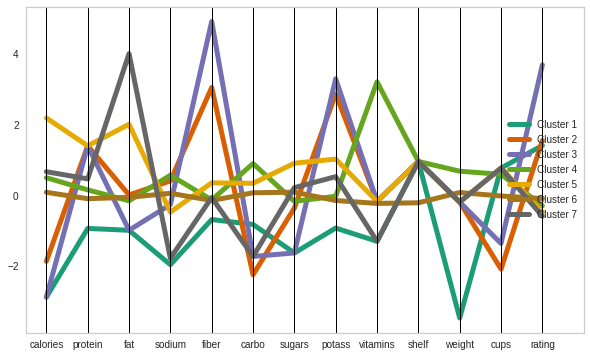

In [ ]:
centroids['clusterlabel'] = ['Cluster {}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='clusterlabel', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.85, 0.5))
plt.xlim(-0.5,13)

### 2. Complete Linkage

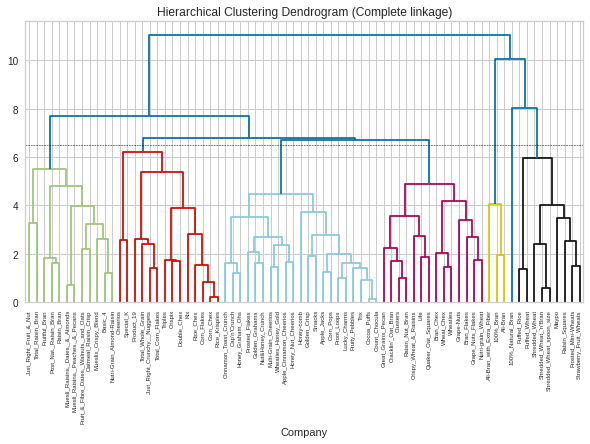

In [ ]:
Z = linkage(df_norm, method='complete')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=df_norm.index, color_threshold=6.5)
plt.axhline(y=6.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [ ]:
# Complete Linkage (Maximum distance)

memb = fcluster(linkage(df_norm, 'complete'), 7, criterion='maxclust')
memb = pd.Series(memb, index=df_norm.index)
print('\033[1m'+'Complete linkage cluster membership:'+'\033[0m')
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

Complete linkage cluster membership:
1 :  Basic_4, Fruit_&_Fibre_Dates,_Walnuts,_and_Oats, Fruitful_Bran, Just_Right_Fruit_&_Nut, Muesli_Raisins,_Dates,_&_Almonds, Muesli_Raisins,_Peaches,_&_Pecans, Mueslix_Crispy_Blend, Nutri-Grain_Almond-Raisin, Oatmeal_Raisin_Crisp, Post_Nat._Raisin_Bran, Raisin_Bran, Total_Raisin_Bran
2 :  Cheerios, Corn_Chex, Corn_Flakes, Crispix, Double_Chex, Just_Right_Crunchy__Nuggets, Kix, Product_19, Rice_Chex, Rice_Krispies, Special_K, Total_Corn_Flakes, Total_Whole_Grain, Triples
3 :  Apple_Cinnamon_Cheerios, Apple_Jacks, Cap'n'Crunch, Cinnamon_Toast_Crunch, Cocoa_Puffs, Corn_Pops, Count_Chocula, Froot_Loops, Frosted_Flakes, Fruity_Pebbles, Golden_Crisp, Golden_Grahams, Honey_Graham_Ohs, Honey_Nut_Cheerios, Honey-comb, Lucky_Charms, Multi-Grain_Cheerios, Nut&Honey_Crunch, Smacks, Trix, Wheaties_Honey_Gold
4 :  Bran_Chex, Bran_Flakes, Clusters, Cracklin'_Oat_Bran, Crispy_Wheat_&_Raisins, Grape_Nuts_Flakes, Grape-Nuts, Great_Grains_Pecan, Life, Nutri-grain_Wh

In [ ]:
# Cluster centroids in complete linkage

df_memb=pd.DataFrame(memb)
df_memb=df_memb.rename(columns={0:'clusterlabel'})
df_norm_memb = pd.concat([df_norm,df_memb],axis=1)
centroids = df_norm_memb.groupby(['clusterlabel']).mean()

centroids

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
clusterlabel,,,,,,,,,,,,,
1,1.419274,0.611276,0.666667,0.219585,0.567517,0.231618,0.879665,1.045053,0.381424,0.847566,1.684584,-0.270327,-0.445964
2,0.005877,0.121051,-0.500000,1.005188,-0.577476,1.289568,-0.932354,-0.643472,0.784643,-0.175197,-0.202203,0.877856,0.069993
3,0.199162,-0.926249,0.000000,0.121837,-0.666503,-0.546060,0.964904,-0.746627,-0.183083,-0.664971,-0.202203,0.279865,-0.970224
4,-0.284051,0.455295,0.285714,-0.028767,0.327637,-0.198030,-0.404421,0.259555,-0.183083,0.343387,-0.202203,-0.797129,0.374499
5,-2.216901,1.391180,-0.333333,0.173970,3.666168,-2.086018,-0.794871,3.004149,-0.183083,0.948401,-0.202203,-1.857851,2.257956
6,-1.258529,-0.064641,-0.888889,-1.954761,-0.026824,0.156160,-1.102832,-0.113042,-0.810314,-0.261628,-1.055359,0.116468,1.481258
7,0.658214,0.455295,4.000000,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919,-0.601791


(-0.5, 13.0)

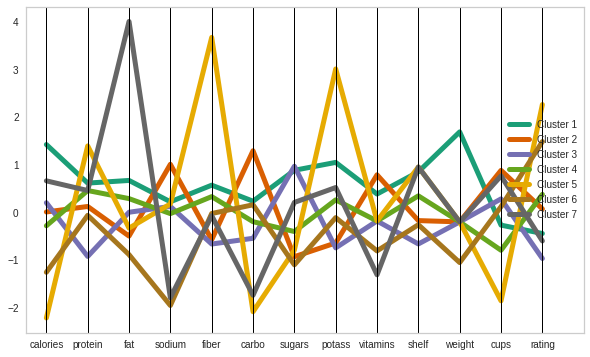

In [ ]:
centroids['clusterlabel'] = ['Cluster {}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='clusterlabel', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.85, 0.5))
plt.xlim(-0.5,13)

### Comparison between single linkage VS. complete linkage: 

* Single linkage leans to the left, whereas complete linkage is more evenly distributed, therefore complete linkage is more stable than single linkage.


### Number of Clusters = 7

* using 6.5 (dot line) in the complete linkage for the cutoff to make 7 clusters because it can cut the dendrogram into evenly clusters despite the outlier.


### Healthy Cereals Recommendation: 
Result has shown that cluster 5 has the most healthy cereal brands: 100%_Bran, All-Bran, All-Bran_with_Extra_Fiber. 

* High in fiber, protein, potassium

* Low in carbohydrate, calories and fat